# Regression with real data


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree

## Parameters

In [2]:
SEED = 73
np.random.seed(SEED)
plt.style.use('ggplot')

TEST_SIZE = 0.2

## Get data

In [3]:
csv_file = './data/insurance.csv'
df = pd.read_csv(csv_file)
print("# of rows: ", len(df))
df.head()

# of rows:  1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Analyze data

#### Check NaN values

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### See counts of sex, children, smoker, and region

In [5]:
print(df['sex'].value_counts())
print(df['children'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


#### Age, BMI, and Charges distribution

Text(0.5, 1.0, 'Charges')

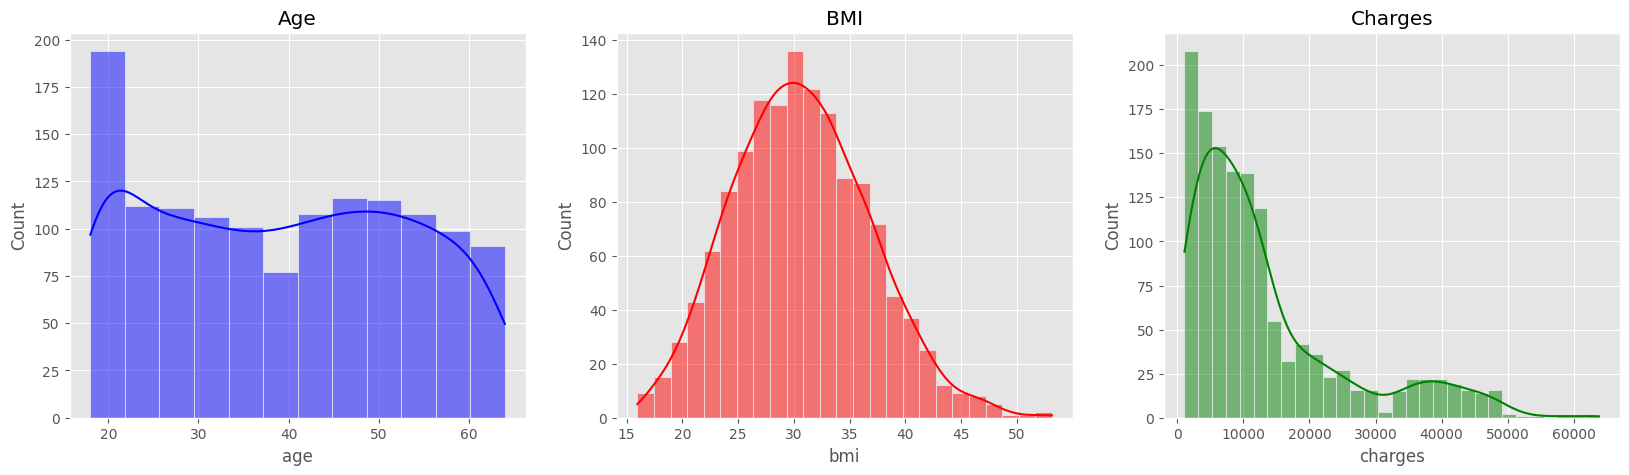

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(df['age'], color='blue', ax=ax[0], kde=True); ax[0].set_title('Age')
sns.histplot(df['bmi'], color='red', ax=ax[1], kde=True); ax[1].set_title('BMI')
sns.histplot(df['charges'], color='green', ax=ax[2], kde=True); ax[2].set_title('Charges')

#### Charges for non-smokers and smokers

Text(0.5, 1.0, 'Smokers')

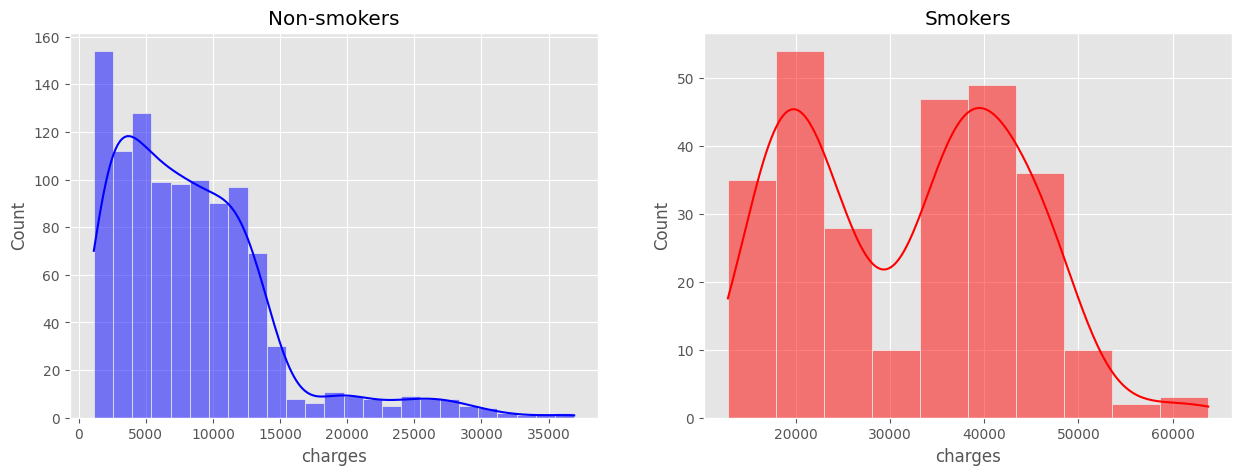

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df[df['smoker'] == 'no']['charges'], color='blue', ax=ax[0], kde=True); ax[0].set_title('Non-smokers')
sns.histplot(df[df['smoker'] == 'yes']['charges'], color='red', ax=ax[1], kde=True); ax[1].set_title('Smokers')

#### Charges for 3 age groups

<Axes: title={'center': 'Charges for 3 age groups'}, ylabel='Count'>

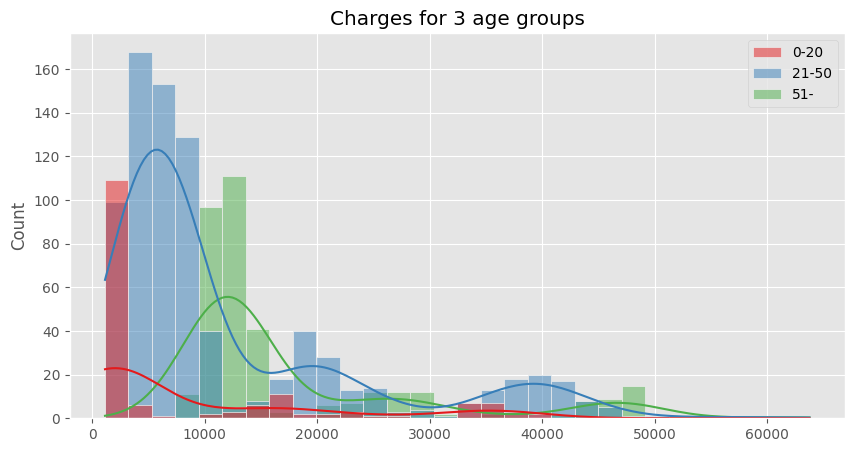

In [8]:
age_groups = pd.cut(df['age'], bins=[0, 20, 50, 100], labels=['0-20', '21-50', '51-'])
age_group1 = df[age_groups == '0-20']['charges']
age_group2 = df[age_groups == '21-50']['charges']
age_group3 = df[age_groups == '51-']['charges']
ages = pd.concat([age_group1, age_group2, age_group3], axis=1)
ages.columns = ['0-20', '21-50', '51-']
plt.figure(figsize=(10, 5))
plt.title('Charges for 3 age groups')
sns.histplot(ages, kde=True, palette='Set1')

### Convert string columns to numerical

In [9]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


### Find correlation between features

<Axes: >

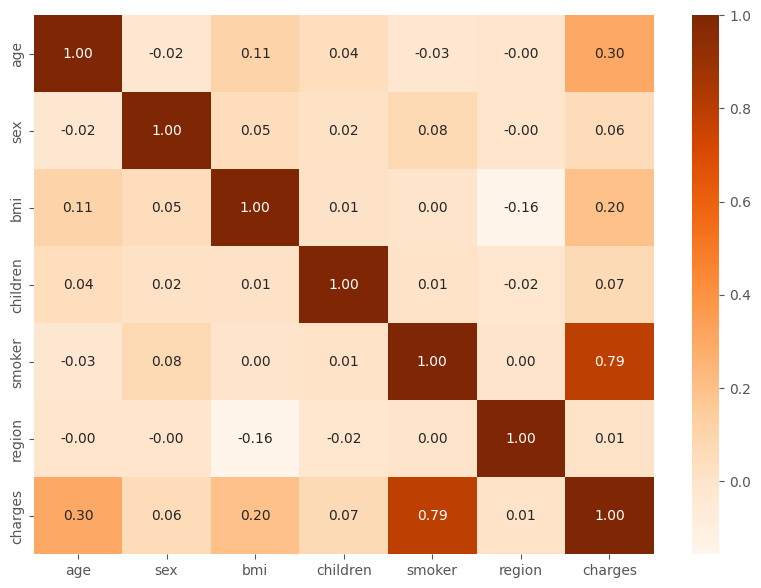

In [10]:
corr = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='Oranges', fmt='.2f')

### Get train and test data

In [11]:
df_x = df.drop(['charges'], axis = 1)
df_x = df[['age', 'bmi', 'smoker']]
df_y = df.charges
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=TEST_SIZE,
                                                                random_state=SEED)
print("# of train rows: ", len(df_x_train), len(df_y_train))
print("# of test rows: ", len(df_x_test), len(df_y_test))

# of train rows:  1070 1070
# of test rows:  268 268


## Train Linear Regression model

In [12]:
model_lr = make_pipeline(StandardScaler(), LinearRegression())
model_lr.fit(df_x_train, df_y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
score1 = model_lr.score(df_x_test, df_y_test)
print(f'Score (linear): {score1:.4f}')

Score (linear): 0.7136


In [14]:
pred_test_model_lr = model_lr.predict(df_x_test)
mae1 = mean_absolute_error(df_y_test, pred_test_model_lr)
print(f'MAE (linear): {int(mae1)}$')

MAE (linear): 4447$


## Train SVR

### Polynomial kernel

In [15]:
model_svr_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', degree=4, C=100, epsilon=0.1, coef0=1))
model_svr_poly.fit(df_x_train, df_y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, coef0=1, degree=4, kernel='poly'))])

In [16]:
score2 = model_svr_poly.score(df_x_test, df_y_test)
print(f'Score (poly): {score2:.4f}')

Score (poly): 0.8249


In [17]:
pred_test_model_svr_poly = model_svr_poly.predict(df_x_test)
mae2 = mean_absolute_error(df_y_test, pred_test_model_svr_poly)
print(f'MAE (poly): {int(mae2)}$')

MAE (poly): 2367$


### Rbf kernel

In [18]:
model_svr_rbf = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1e6, epsilon=0.1, gamma=0.1))
model_svr_rbf.fit(df_x_train, df_y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1000000.0, gamma=0.1))])

In [19]:
score3 = model_svr_rbf.score(df_x_test, df_y_test)
print(f'Score (rbf): {score3:.4f}')

Score (rbf): 0.8336


In [20]:
pred_test_model_svr_rbf = model_svr_rbf.predict(df_x_test)
mae3 = mean_absolute_error(df_y_test, pred_test_model_svr_rbf)
print(f'MSE (rbf): {int(mae3)}$')

MSE (rbf): 2219$


## Train Decision Tree Regressor

In [25]:
model_dt = make_pipeline(StandardScaler(),
                         DecisionTreeRegressor(max_depth=3, random_state=SEED))
model_dt.fit(df_x_train, df_y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=3, random_state=73))])

In [26]:
score4 = model_dt.score(df_x_test, df_y_test)
print(f'Score (dt): {score4:.4f}')

Score (dt): 0.8542


In [27]:
pred_test_model_dt = model_dt.predict(df_x_test)
mae4 = mean_absolute_error(df_y_test, pred_test_model_dt)
print(f'MAE (dt): {int(mae4)}$')

MAE (dt): 2714$


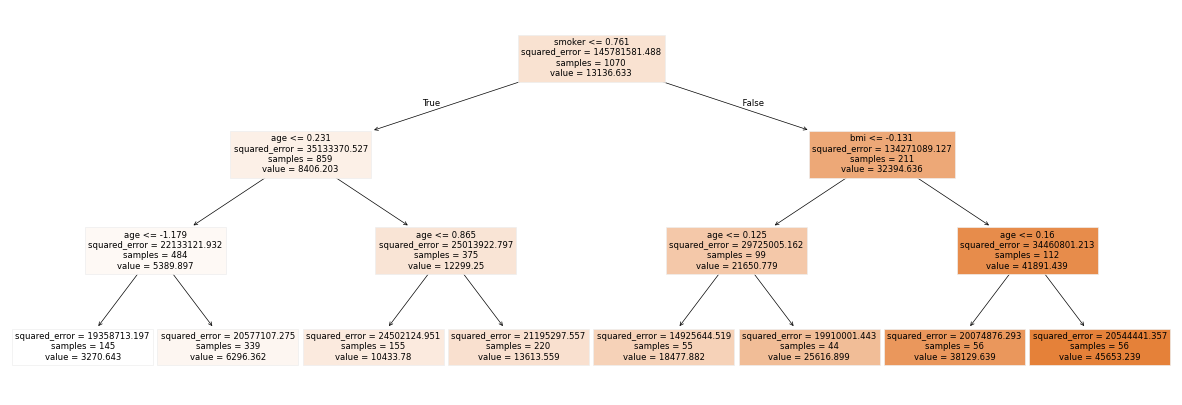

In [34]:
plt.figure(figsize=(15, 5))
plot_tree(model_dt.named_steps['decisiontreeregressor'], filled=True, feature_names=df_x.columns)
plt.show()

## Train Random Forest Regressor

In [38]:
model_rf = make_pipeline(StandardScaler(),
                         RandomForestRegressor(n_estimators=100,
                                               max_depth=3,
                                               random_state=SEED))
model_rf.fit(df_x_train, df_y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=3, random_state=73))])

In [39]:
score5 = model_rf.score(df_x_test, df_y_test)
print(f'Score (rf): {score5:.4f}')

Score (rf): 0.8575


In [40]:
pred_test_model_rf = model_rf.predict(df_x_test)
mae4 = mean_absolute_error(df_y_test, pred_test_model_rf)
print(f'MAE (rf): {int(mae4)}$')

MAE (rf): 2614$
